In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import glob

In [3]:
# assuming ipynb is in the same directory as spotify data
# read all history files into a dataframe
history = pd.DataFrame()
for name in glob.glob("./StreamingHistory?.json"):
    history = history.append(pd.read_json(name))

In [4]:
# clean up - convert to minutes
# remove tracks listened for less than 30s, and prep endtimes
history['msPlayed'] = history['msPlayed'].div(60000)
history = history[history['msPlayed'] > .5]
history['endTime'] = pd.to_datetime(history['endTime'])

In [6]:
history.head(25)

,artistName,endTime,msPlayed,trackName
0,Hot Lunch,2019-01-01 00:17:00,4.089250,Monks On the Moon
1,Flora Matos,2019-01-01 00:36:00,2.819433,Esperar o Sol
2,Mick Jagger,2019-01-01 01:21:00,4.231633,Gotta Get A Grip - Kevin Parker Remix
3,Frost da Great,2019-01-01 01:54:00,1.264400,Shine Your Light
4,Ought,2019-01-01 01:58:00,4.283450,Beautiful Blue Sky
5,!!!,2019-01-01 02:00:00,2.243933,Hello? Is This Thing On?
6,Plastilina Mosh,2019-01-01 02:04:00,3.835100,Bareta Â´89
7,Cibo Matto,2019-01-01 02:56:00,4.476117,King of Silence - Dan the Automator Remix; 200...
10,Jimi Hendrix,2019-01-01 03:00:00,3.468667,Jungle
11,The Mystery Lights,2019-01-01 03:04:00,4.196883,What Happens When You Turn the Devil Down


# Basic Stats

In [7]:
# some basic stats
uniqueTracks = len(history.trackName.unique())
print("number of tracks listened: ", uniqueTracks)
uniqueArtists = len(history.artistName.unique())
print("number of artists listened: ", uniqueArtists)
minutes = history['msPlayed'].sum()
print("minutes: ", minutes)
print("hours: ", minutes/60)
print("days: ", minutes/60/24)

number of tracks listened:  6463
number of artists listened:  2312
minutes:  77743.00391666667
hours:  1295.7167319444445
days:  53.98819716435185


In [8]:
df = history.groupby(history.endTime.dt.date)['msPlayed'].sum()
idx = pd.date_range('2019-01-01', '2019-12-31')
df.index = pd.DatetimeIndex(df.index)
df = df.reindex(idx, fill_value=0)

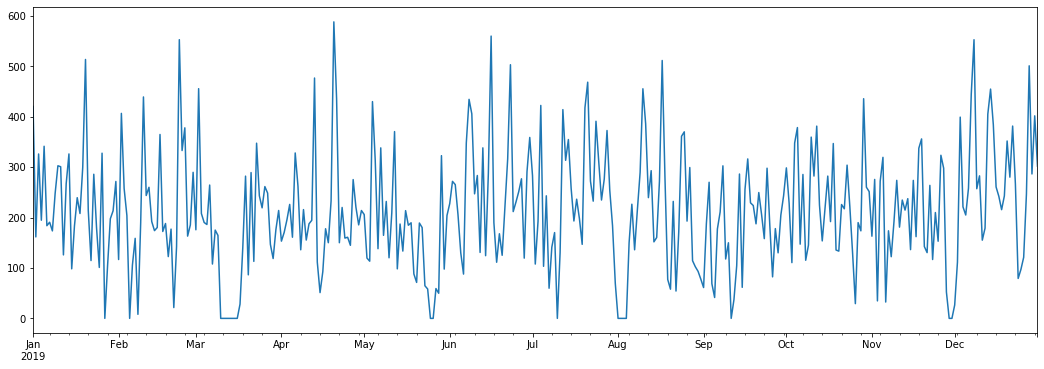

In [9]:
# plot minutes/day
df.plot(figsize=(18,6))

# Most played

In [10]:
# top tracks
history.groupby(['trackName']).artistName.value_counts().nlargest(50)

trackName                       artistName                      
Just A Song Before I Go         Crosby, Stills & Nash               22
Sense                           King Gizzard & The Lizard Wizard    22
Desire Be Desire Go             Tame Impala                         21
Regret                          St. Vincent                         21
Ritual Union                    Little Dragon                       21
Deliverance                     Opeth                               20
Flesh without Blood             Grimes                              20
Patience                        Tame Impala                         20
Burnin' for You                 Blue Ã–yster Cult                   19
Linus Spacehead                 Wavves                              19
Soul Miner                      Tommy Guerrero                      19
Cigarettes                      Tash Sultana                        18
Epoch                           Tycho                               18
Expectation 

In [11]:
# plays/artist
history['artistName'].value_counts().nlargest(50)

Tame Impala                           553
Opeth                                 463
The Black Keys                        226
Porcupine Tree                        205
Courtney Barnett                      165
TOOL                                  152
Pond                                  150
Rush                                  133
Queens of the Stone Age               123
MGMT                                  123
The National                          122
Black Sabbath                         120
King Gizzard & The Lizard Wizard      119
David Bowie                           118
Led Zeppelin                          118
Radio Moscow                          113
Childish Gambino                      113
Against Me!                           113
Jimi Hendrix                          112
Unknown Mortal Orchestra              109
Hiatus Kaiyote                        109
Steven Wilson                         107
Melvins                               103
ZZ Top                            

In [12]:
# hours/artist
history.groupby('artistName').msPlayed.sum().nlargest(50)/60

artistName
Opeth                               54.549676
Tame Impala                         38.863421
Porcupine Tree                      20.352691
TOOL                                15.296568
Steven Wilson                       13.163432
The Black Keys                      11.941793
Rush                                10.375719
Black Sabbath                       10.058073
Courtney Barnett                    10.043984
Pond                                 9.336315
MGMT                                 9.055407
Led Zeppelin                         8.435697
King Gizzard & The Lizard Wizard     8.317366
Radio Moscow                         8.229612
Queens of the Stone Age              8.084742
Childish Gambino                     7.838329
Hiatus Kaiyote                       7.111647
The National                         7.085414
David Bowie                          7.063813
Unknown Mortal Orchestra             6.873448
Jimi Hendrix                         6.656157
Tash Sultana           